# Section 42 (Part 2): Tuning Neural Networks

- 10/22/20
- online-ds-ft-070620

> NOTE: YOU MAY **NOT** USE THE FUNCTIONS FROM THIS NOTEBOOK IN YOUR PROJECTS

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
- Learn how to set up email notifications via Python (for gridsearch results)


## Questions/Comments?
- Is the workflow in the lab fairly typical?  Why is gridsearch not a good choice for hyperparameter tuning?


## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Overview  - Neural Network Tuning 

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
    

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  


<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Additional Options

#### Dropout 

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to detect cats vs dogs

## Installs, Imports, & Functions

In [1]:
import numpy as np
np.random.seed(321)

In [2]:
# !pip install -U imageio
# !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# from skimage.transform import resize
# from imageio import imread

In [3]:
# !pip install -U fsds
from fsds.imports import *


fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [4]:
# !pip install -U tensorflow
import tensorflow as tf
tf.random.set_seed(321) 

In [5]:
## Import Tensorflow Model Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten

## Import Tensorflow Preprocessing Tools
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [6]:
from PIL import Image
import os,glob

## Loading in the data

- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [7]:
# change dataset_folder to match where you stored the files
base_folder ="/Users/jamesirving/Datasets/dogs-vs-cats-sorted/" #"/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"

## Check contents of base folder
os.listdir(base_folder)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [8]:
## Define train_folder and test_folder
train_folder = base_folder+"training_set/"
test_folder =  base_folder+"test_set/"

## Check contents of train_folder
os.listdir(test_folder)

['dogs', 'cats', '.DS_Store', 'example_save.jpg']

### Using ImageDataGenerator.flow_from_directory to make X and y vars

In [9]:
## get num images
import os,glob
def get_num_images(train_folder,folders=['dogs','cats'],verbose=True):
    """Gets the total number of images from all folders listed"""
    num_images = 0
    for folder in folders:
        num_in_folder = len(os.listdir(train_folder+folder))
        
        if verbose:
            print(f"- There are {num_in_folder} images in {folder} folder.")
        num_images+=num_in_folder
    return num_images



## Get the Number of total images for batch size 
BATCH_SIZE_TRAIN = get_num_images(train_folder)
BATCH_SIZE_VAL_TEST = get_num_images(test_folder)
print(f"Training images: {BATCH_SIZE_TRAIN}")
print(f"Test & Val images: {BATCH_SIZE_VAL_TEST}")

## Make validation split
VAL_SPLIT = 0.2
BATCH_SIZE_VAL = round(BATCH_SIZE_VAL_TEST*VAL_SPLIT)
BATCH_SIZE_TEST = round(BATCH_SIZE_VAL_TEST*(1-VAL_SPLIT))

BATCH_SIZE_TRAIN,BATCH_SIZE_TEST,BATCH_SIZE_VAL

- There are 4001 images in dogs folder.
- There are 4001 images in cats folder.
- There are 1001 images in dogs folder.
- There are 1001 images in cats folder.
Training images: 8002
Test & Val images: 2002


(8002, 1602, 400)

In [10]:
## MAKING IMAGE DATA GENERATORS FOR TRAIN TEST VAL
IMG_SIZE = (64,64)

## Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,)
#                                    shear_range = 0.2, zoom_range = 0.2,
#                                    horizontal_flip = True)
test_val_datagen = ImageDataGenerator(rescale=1./255,validation_split=VAL_SPLIT)


In [11]:
## Make Training Sets With All Images
training_set_full = train_datagen.flow_from_directory(train_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_TRAIN)                                          
                                                      

test_set_full = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_TEST,
                                                    subset='training')  

val_set_full = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_VAL,
                                                    subset='validation')  

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
## MAKE X and YS FROM GENERATORS
X_train, y_train  = next(training_set_full)
# TEST AND VAL SETS
X_test, y_test = next(test_set_full)
X_val,y_val = next(val_set_full)

In [13]:
X_train.shape

(8000, 64, 64, 3)

In [14]:
## What form is our target (How many col)?
y_train

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [15]:
## Finding class indices
training_set_full.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
## UNROW IMAGES FOR SEQUENTIAL MODEL
X_train_unrow = X_train.reshape( X_train.shape[0],-1)
X_test_unrow = X_test.reshape( X_test.shape[0],-1)
X_val_unrow = X_val.reshape( X_val.shape[0],-1)

X_train_unrow.shape

(8000, 12288)

1.0

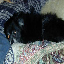

In [17]:
## Display random image 
import numpy as np
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train[i]))#.reshape(32,32,3)))

## Using Dense Networks

In [18]:
y_train.shape

(8000,)

In [19]:
X_train_unrow.shape

(8000, 12288)

In [20]:
##N Sequential model: 64 units, relu, final=dense 1, sigmoid
model_1 = Sequential()
model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',optimizer='adam',
                metrics=['accuracy',tf.metrics.Recall()])
display(model_1.summary())

## Fit Model with 20 epochs
history = model_1.fit(X_train_unrow,y_train, epochs=20,
                      validation_data=(X_val_unrow,y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                786496    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.7724 - accuracy: 0.5464 - recall: 0.5502 - val_loss: 0.6812 - val_accuracy: 0.5475 - val_recall: 0.3500
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.5711 - recall: 0.5660 - val_loss: 0.6692 - val_accuracy: 0.5625 - val_recall: 0.4400
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6808 - accuracy: 0.5726 - recall: 0.5725 - val_loss: 0.7302 - val_accuracy: 0.5450 - val_recall: 0.1750
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6706 - accuracy: 0.5950 - recall: 0.5900 - val_loss: 0.8283 - val_accuracy: 0.5225 - val_recall: 0.9850
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6574 - accuracy: 0.6125 - recall: 0.6125 - val_loss: 0.6704 - val_accuracy: 0.5600 - val_recall: 0.6000
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.6183 

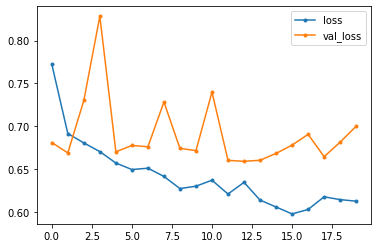

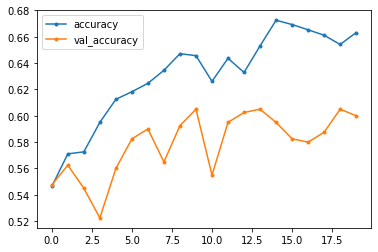

In [21]:
## Get History  as adf
history_df = pd.DataFrame(history.history)
history_df

## PLotn all fo the metrics in history
metric_list=['loss','acc']

for metric in metric_list:
    history_df[[col for col in history_df.columns if metric in col]].plot(marker='.')

In [22]:
## Get PRedictions
y_hat_test = model_1.predict(X_test_unrow).round()
y_hat_test

## Classification Report
from sklearn import metrics
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

         0.0       0.58      0.86      0.69       800
         1.0       0.72      0.37      0.49       800

    accuracy                           0.61      1600
   macro avg       0.65      0.61      0.59      1600
weighted avg       0.65      0.61      0.59      1600



## Functionize Model Creation & Plotting

In [23]:
## def make_model
def make_model(verbose=True):
    model_1 = Sequential()
    model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(1, activation='sigmoid'))

    model_1.compile(loss='binary_crossentropy',optimizer='adam',
                    metrics=['accuracy',tf.metrics.Recall()])
    if verbose:
        model_1.summary()
    return model_1

In [24]:
def plot_history(history, metric_list=['loss','acc']):
    ## Get History  as adf
    history_df = pd.DataFrame(history.history)
    ## PLotn all fo the metrics in history
   
    for metric in metric_list:
        history_df[[col for col in history_df.columns if metric in col]].plot(
        marker='o',ls=':')
        
    plt.suptitle('Training History')
    plt.show()

In [25]:
# ## Use new functions to make model and plot history
# model_2 = make_model()
# history = model_2.fit(X_train_unrow,y_train, epochs=20,
#                       validation_data=(X_val_unrow,y_val))
# plot_history(history)

### Combine the Whole Process Into One Func

In [26]:
import datetime as dt
from tzlocal import get_localzone
start = dt.datetime.now(tz=get_localzone())

In [27]:

def make_fit_plot_model(build_fn, fit_kws=dict(epochs=20)):
    ## Print Start Time
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    print('---'*20)    
    print(f'[i] MODEL CREATED AT {start.strftime(fmt)}')
    print('---'*20)
    print()
    
    ## Use new functions to make model and plot history
    model = build_fn()
    history = model.fit(X_train_unrow,y_train, **fit_kws,
                          validation_data=(X_val_unrow,y_val))
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'\n[!] Training Completed AT {end.strftime(fmt)}')
    print()


    plot_history(history)
    y_hat_test = model.predict(X_test_unrow).round()        

    print('---'*20)  
    print('---'*20)  
    print('[i] Classification Report')
    print(metrics.classification_report(y_test,y_hat_test))
    print(f"\n[i] Total Training Time: {end-start}")
    print('---'*20)  
    return model

------------------------------------------------------------
[i] MODEL CREATED AT 10/23/20 - 13:06:03 PM
------------------------------------------------------------

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 1s 5ms/step - loss: 0.7594 - accuracy: 0.5044 - recall_1: 0.0495 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_1: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4967 - recall_1: 0.1848 - val_loss: 0.6931 - val_accuracy: 0

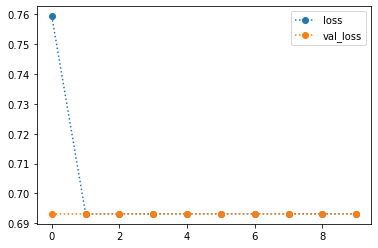

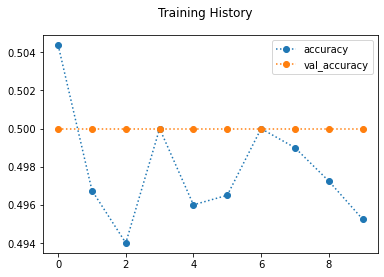

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       800
         1.0       0.50      1.00      0.67       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600


[i] Total Training Time: 0:00:10.652521
------------------------------------------------------------


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [28]:
## Test out new function
model_2 =make_fit_plot_model(make_model,fit_kws={'epochs':10})

# Sect 42, Part 2: HyperParameter Tuning - Callbacks & GridSearchCV

## Activity: Ok...so now what??

> Using the rules of thumb and your own knowledge/research, attempt several methods to improve the results of the model. 

In [29]:
## def make_model
def make_model2(verbose=True):
    """Creats a Sequential Model with 3 layers"""
    model_1 = Sequential()
    model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(32, activation='relu'))
    model_1.add(Dense(1, activation='sigmoid'))

    model_1.compile(loss='binary_crossentropy',optimizer='adam',
                    metrics=['accuracy',tf.metrics.Recall()])
    if verbose:
        model_1.summary()
    return model_1

------------------------------------------------------------
[i] MODEL CREATED AT 10/23/20 - 13:06:15 PM
------------------------------------------------------------

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.7465 - accuracy: 0.5246 - recall_2: 0.5495 - val_loss: 0.6859 - val_accuracy: 0.5675 - val_recall_2: 0.6500
Epoch 2/20
250/250 [=======

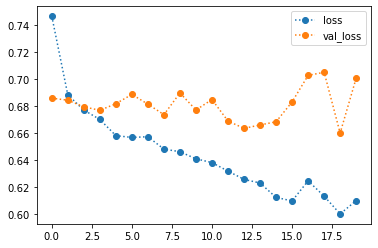

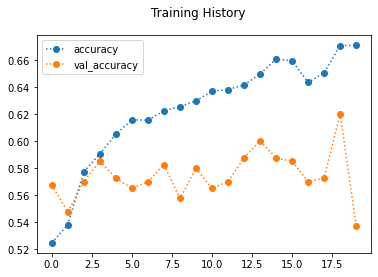

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         0.0       0.53      0.97      0.69       800
         1.0       0.85      0.15      0.25       800

    accuracy                           0.56      1600
   macro avg       0.69      0.56      0.47      1600
weighted avg       0.69      0.56      0.47      1600


[i] Total Training Time: 0:00:20.532239
------------------------------------------------------------


In [30]:
make_fit_plot_model(make_model2)

## Keras CallBacks

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

MODEL_FPATH = '/Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/076020ft/'
MONITOR = 'val_accuracy'
os.makedirs(MODEL_FPATH,exist_ok=True)

checkpoint = ModelCheckpoint(
    filepath=MODEL_FPATH+"weights-improvement-{epoch:02d}-{"+MONITOR+":.2f}.hdf5",
    verbose=0, save_best_only=True, mode='max')


earlystopping = EarlyStopping(monitor='val_accuracy',min_delta=0.05,
                             patience=3, restore_best_weights=True,verbose=1)

callbacks =[earlystopping,checkpoint]



In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
def make_callbacks(MONITOR = 'val_accuracy',min_delta=0.05, patience=5, 
                   MODEL_FPATH = '/Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/076020ft/'):


    ## Make folders
    os.makedirs(MODEL_FPATH,exist_ok=True)

    ## Make Checkppoint
    checkpoint = ModelCheckpoint(
        filepath=MODEL_FPATH+"weights-improvement-{epoch:02d}-{"+MONITOR+":.2f}.hdf5",
        verbose=0, save_best_only=True, mode='auto')

    ## Make Earlystopping
    earlystopping = EarlyStopping(monitor='val_accuracy',patience=patience,
                                  min_delta=min_delta,
                                  restore_best_weights=True,verbose=1)
    
    return [earlystopping,checkpoint]



## Updating Our Function

### `def make_fit_evaluate_model`

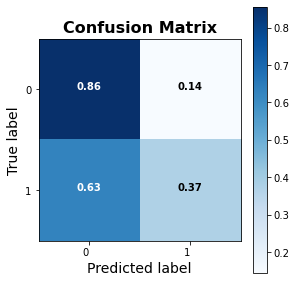

In [33]:
def plot_confusion_matrix(conf_matrix, classes = None, 
                          title='Confusion Matrix',normalize='true', 
                          cmap="Blues",
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        cm = metrics.confusion_matrix(y_true,y_pred,normalize=normalize)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
        thresh=0.5
    else:
       # Determine threshold for b/w text
        thresh = cm.max() / 2.
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

 

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black",**fontDict['data_labels']) #

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    return fig



plot_confusion_matrix((y_test,y_hat_test));

In [34]:
import inspect
def make_fit_evaluate_model(build_fn,train_data = (X_train_unrow,y_train),
                            test_data = ( X_test_unrow,y_test),
                            validation_data =(X_val_unrow,y_val),
                            fit_kws=dict(epochs=20),classes=['cat','dog']):
    """Creates a Keras model from the build function, displays the time at start
    of training, then agian when training complete. 
    Displays training histroy, classification report, and confisoon matrix"""
    ## Print Start Time
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    print('---'*20)    
    print(f'[i] MODEL CREATED AT {start.strftime(fmt)}')
    print('---'*20)
    print()
    
    
    if inspect.isfunction(build_fn):
        ## Use new functions to make model and plot history
        model = build_fn()
    else: 
        model = build_fn
    
    ## Fit Model
    history = model.fit(*train_data, **fit_kws,callbacks=make_callbacks(),
                          validation_data=validation_data)
    
    ## Save end time
    end = dt.datetime.now(tz=get_localzone())
    print('\n'+'---'*20)
    print(f'\n[!] Training Completed AT {end.strftime(fmt)}')
    print()
    
    ## Plot History
    plot_history(history)
    
    print('---'*20)  
    print('---'*20)  
    print('[i] Classification Report')
    
    ## Separate Test_data
    X_test,y_test = test_data
    y_hat_test = model.predict(X_test).round()        
    
    print(metrics.classification_report(y_test,y_hat_test,target_names=classes))
    
    ## Plot confusion matrix 
    plot_confusion_matrix((y_test,y_hat_test),classes=classes);
    plt.show()
    print(f"\n[i] Total Training Time: {end-start}")
    print('---'*20)  
    return model

------------------------------------------------------------
[i] MODEL CREATED AT 10/23/20 - 13:06:36 PM
------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 2s 8ms/step - loss: 0.7849 - accuracy: 0.5447 - recall_3: 0.5368 - val_loss: 0.7365 - val_accuracy: 0.5325 - val_recall_3: 0.1200
Epoch 2/20
250/250 [=======

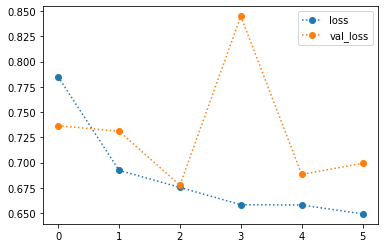

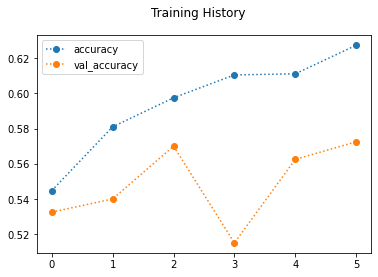

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         cat       0.53      0.92      0.67       800
         dog       0.68      0.17      0.27       800

    accuracy                           0.54      1600
   macro avg       0.60      0.54      0.47      1600
weighted avg       0.60      0.54      0.47      1600



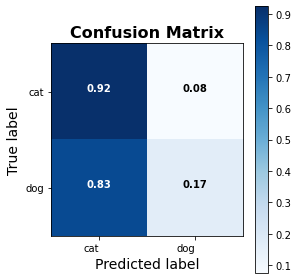


[i] Total Training Time: 0:00:07.524682
------------------------------------------------------------


In [35]:
make_fit_evaluate_model(make_model2)

In [103]:
training_set_full.class_indices

{'cats': 0, 'dogs': 1}

## GridSearch

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [43]:
## def make_model

def make_model_to_tune(n_hidden_units =(64,32),optimizer='adam',
                       act_func1='relu',act_func2 ='relu' ,
                       verbose=True,):
    """Creats a Sequential Model with 3 layers"""
    model_1 = Sequential()
 
    model_1.add(Dense(n_hidden_units[0],activation=act_func1,input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(n_hidden_units[1], activation=act_func2))
    
    model_1.add(Dense(1, activation='sigmoid'))

    model_1.compile(loss='binary_crossentropy',optimizer=optimizer,
                    metrics=['accuracy',tf.metrics.Recall()])
    if verbose:
        model_1.summary()
    return model_1

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
167/167 [==============================] - 1s 6ms/step - loss: 0.7299 - accuracy: 0.5367 - recall_15: 0.5268 - val_loss: 0.6756 - val_accuracy: 0.5425 - val_recall_15: 0.3300
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 0.7129 - accuracy: 0.5616 - recall_15: 0.5321 - val_loss: 0.6907 - val_accuracy: 0.5275 - val_recall_15: 0.8950
Epoch

167/167 [==============================] - 2s 9ms/step - loss: 0.7933 - accuracy: 0.5314 - recall_18: 0.5188 - val_loss: 0.9003 - val_accuracy: 0.5125 - val_recall_18: 0.0250
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.7329 - accuracy: 0.5698 - recall_18: 0.5625 - val_loss: 0.7026 - val_accuracy: 0.5625 - val_recall_18: 0.9200
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.7240 - accuracy: 0.5612 - recall_18: 0.5545 - val_loss: 0.6798 - val_accuracy: 0.5975 - val_recall_18: 0.8200
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6880 - accuracy: 0.5998 - recall_18: 0.5875 - val_loss: 0.7483 - val_accuracy: 0.5400 - val_recall_18: 0.1150
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6424 - accuracy: 0.6250 - recall_18: 0.6088 - val_loss: 0.6926 - val_accuracy: 0.5925 - val_recall_18: 0.3600
Epoch 6/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6685 

167/167 [==============================] - 1s 5ms/step - loss: 0.6943 - accuracy: 0.5693 - recall_21: 0.5515 - val_loss: 0.6750 - val_accuracy: 0.6075 - val_recall_21: 0.8450
Epoch 3/20
167/167 [==============================] - 1s 5ms/step - loss: 0.6713 - accuracy: 0.5839 - recall_21: 0.5750 - val_loss: 0.6950 - val_accuracy: 0.5600 - val_recall_21: 0.8800
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6683 - accuracy: 0.5967 - recall_21: 0.5860 - val_loss: 0.6639 - val_accuracy: 0.6125 - val_recall_21: 0.5500
Epoch 5/20
167/167 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.5972 - recall_21: 0.5754 - val_loss: 0.6677 - val_accuracy: 0.5925 - val_recall_21: 0.4700
Epoch 6/20
167/167 [==============================] - 1s 5ms/step - loss: 0.6486 - accuracy: 0.6167 - recall_21: 0.6020 - val_loss: 0.6635 - val_accuracy: 0.5875 - val_recall_21: 0.6250
Epoch 00006: early stopping
84/84 [==============================] - 0s 2ms/step 

167/167 [==============================] - 1s 8ms/step - loss: 0.8301 - accuracy: 0.5282 - recall_25: 0.5300 - val_loss: 0.6854 - val_accuracy: 0.5525 - val_recall_25: 0.7750
Epoch 2/20
167/167 [==============================] - 1s 6ms/step - loss: 0.7097 - accuracy: 0.5548 - recall_25: 0.5611 - val_loss: 0.7329 - val_accuracy: 0.5525 - val_recall_25: 0.1100
Epoch 3/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6795 - accuracy: 0.5745 - recall_25: 0.5773 - val_loss: 0.6684 - val_accuracy: 0.5825 - val_recall_25: 0.4900
Epoch 4/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6872 - accuracy: 0.5700 - recall_25: 0.5705 - val_loss: 0.6696 - val_accuracy: 0.5850 - val_recall_25: 0.4800
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6664 - accuracy: 0.5959 - recall_25: 0.5926 - val_loss: 0.6800 - val_accuracy: 0.5700 - val_recall_25: 0.2850
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6635 

167/167 [==============================] - 1s 5ms/step - loss: 0.7860 - accuracy: 0.4936 - recall_29: 0.3591 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_29: 1.0000
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5071 - recall_29: 0.6057 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_29: 0.0000e+00
Epoch 3/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5013 - recall_29: 0.7475 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_29: 0.0000e+00
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5030 - recall_29: 0.5898 - val_loss: 0.6941 - val_accuracy: 0.5000 - val_recall_29: 0.0000e+00
Epoch 5/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4931 - recall_29: 0.5853 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_29: 0.0000e+00
Epoch 6/20
167/167 [==============================] - 1s 4ms/step

167/167 [==============================] - 1s 5ms/step - loss: 1.0009 - accuracy: 0.5239 - recall_33: 0.5139 - val_loss: 0.7811 - val_accuracy: 0.5325 - val_recall_33: 0.1400
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 0.7744 - accuracy: 0.5607 - recall_33: 0.5488 - val_loss: 0.8360 - val_accuracy: 0.5250 - val_recall_33: 0.9500
Epoch 3/20
167/167 [==============================] - 1s 3ms/step - loss: 0.7399 - accuracy: 0.5751 - recall_33: 0.5689 - val_loss: 0.7090 - val_accuracy: 0.5625 - val_recall_33: 0.2400
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 0.7224 - accuracy: 0.5860 - recall_33: 0.5834 - val_loss: 1.0535 - val_accuracy: 0.5025 - val_recall_33: 0.0100
Epoch 5/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.6083 - recall_33: 0.5929 - val_loss: 0.7106 - val_accuracy: 0.5475 - val_recall_33: 0.2400
Epoch 6/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6830 

167/167 [==============================] - 1s 7ms/step - loss: 1.0796 - accuracy: 0.5207 - recall_37: 0.5281 - val_loss: 1.0206 - val_accuracy: 0.5175 - val_recall_37: 0.0550
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.8256 - accuracy: 0.5532 - recall_37: 0.5525 - val_loss: 1.0519 - val_accuracy: 0.5200 - val_recall_37: 0.9750
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.8125 - accuracy: 0.5826 - recall_37: 0.5855 - val_loss: 0.7916 - val_accuracy: 0.5550 - val_recall_37: 0.1550
Epoch 4/20
167/167 [==============================] - 1s 6ms/step - loss: 0.7377 - accuracy: 0.5873 - recall_37: 0.5885 - val_loss: 0.8070 - val_accuracy: 0.5350 - val_recall_37: 0.1000
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.7065 - accuracy: 0.5959 - recall_37: 0.5863 - val_loss: 0.6736 - val_accuracy: 0.5700 - val_recall_37: 0.3100
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6474 

167/167 [==============================] - 1s 4ms/step - loss: 0.6863 - accuracy: 0.5873 - recall_40: 0.5810 - val_loss: 0.7102 - val_accuracy: 0.5450 - val_recall_40: 0.1950
Epoch 6/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6642 - accuracy: 0.6010 - recall_40: 0.6103 - val_loss: 0.6743 - val_accuracy: 0.5850 - val_recall_40: 0.7400
Epoch 7/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6589 - accuracy: 0.6102 - recall_40: 0.6080 - val_loss: 0.7395 - val_accuracy: 0.5425 - val_recall_40: 0.1350
Epoch 8/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6686 - accuracy: 0.6077 - recall_40: 0.6035 - val_loss: 0.7598 - val_accuracy: 0.5425 - val_recall_40: 0.9150
Epoch 9/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6636 - accuracy: 0.6190 - recall_40: 0.6283 - val_loss: 0.7103 - val_accuracy: 0.5375 - val_recall_40: 0.8600
Epoch 00009: early stopping
84/84 [==============================] - 0s 2ms/step 

167/167 [==============================] - 1s 8ms/step - loss: 1.0083 - accuracy: 0.5231 - recall_44: 0.5354 - val_loss: 1.1795 - val_accuracy: 0.5000 - val_recall_44: 0.0000e+00
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.7578 - accuracy: 0.5502 - recall_44: 0.5598 - val_loss: 0.7058 - val_accuracy: 0.5350 - val_recall_44: 0.8550
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6808 - accuracy: 0.5881 - recall_44: 0.5931 - val_loss: 0.7023 - val_accuracy: 0.5550 - val_recall_44: 0.8100
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6783 - accuracy: 0.5969 - recall_44: 0.6079 - val_loss: 0.6739 - val_accuracy: 0.5625 - val_recall_44: 0.4800
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6968 - accuracy: 0.5864 - recall_44: 0.5924 - val_loss: 0.8669 - val_accuracy: 0.5075 - val_recall_44: 0.9850
Epoch 6/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6

84/84 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4880 - recall_47: 0.9992
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 128)               1572992   
_________________________________________________________________
dense_143 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 33        
Total params: 1,577,153
Trainable params: 1,577,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
167/167 [==============================] - 1s 9ms/step - loss: 0.6969 - accuracy: 0.4993 - recall_48: 0.3046 - val_loss: 0.6934 - val_accuracy: 0.5000 - val_recall_48: 1.0000
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6938

167/167 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.5061 - recall_51: 0.4413 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_51: 0.0000e+00
Epoch 6/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6979 - accuracy: 0.4982 - recall_51: 0.4030 - val_loss: 0.6937 - val_accuracy: 0.5000 - val_recall_51: 1.0000
Epoch 00006: early stopping
84/84 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5126 - recall_51: 1.0000
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 64)                786496    
_________________________________________________________________
dense_155 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 33        
Total params: 7

167/167 [==============================] - 1s 7ms/step - loss: 0.6990 - accuracy: 0.4995 - recall_55: 0.5075 - val_loss: 0.6939 - val_accuracy: 0.5000 - val_recall_55: 1.0000
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6974 - accuracy: 0.4965 - recall_55: 0.4325 - val_loss: 0.7130 - val_accuracy: 0.5000 - val_recall_55: 1.0000
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6957 - accuracy: 0.5061 - recall_55: 0.4921 - val_loss: 0.6958 - val_accuracy: 0.5000 - val_recall_55: 0.0000e+00
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6967 - accuracy: 0.5091 - recall_55: 0.4651 - val_loss: 0.7052 - val_accuracy: 0.5000 - val_recall_55: 0.0000e+00
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6986 - accuracy: 0.4984 - recall_55: 0.4824 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_55: 0.0000e+00
Epoch 00006: early stopping
84/84 [==============================] - 

167/167 [==============================] - 1s 5ms/step - loss: 0.8070 - accuracy: 0.5112 - recall_59: 0.4891 - val_loss: 0.6942 - val_accuracy: 0.5000 - val_recall_59: 1.0000
Epoch 2/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.5000 - recall_59: 0.5454 - val_loss: 0.6948 - val_accuracy: 0.5000 - val_recall_59: 0.0000e+00
Epoch 3/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6967 - accuracy: 0.4951 - recall_59: 0.5642 - val_loss: 0.6957 - val_accuracy: 0.5000 - val_recall_59: 0.0000e+00
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.4970 - recall_59: 0.5524 - val_loss: 0.6941 - val_accuracy: 0.5000 - val_recall_59: 1.0000
Epoch 5/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6991 - accuracy: 0.4940 - recall_59: 0.5909 - val_loss: 0.6933 - val_accuracy: 0.5000 - val_recall_59: 1.0000
Epoch 6/20
167/167 [==============================] - 1s 4ms/step - loss:

167/167 [==============================] - 1s 5ms/step - loss: 0.8215 - accuracy: 0.5008 - recall_63: 0.4239 - val_loss: 0.6938 - val_accuracy: 0.5000 - val_recall_63: 1.0000
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6956 - accuracy: 0.5018 - recall_63: 0.4512 - val_loss: 0.6938 - val_accuracy: 0.5000 - val_recall_63: 0.0000e+00
Epoch 3/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6952 - accuracy: 0.4888 - recall_63: 0.3145 - val_loss: 0.6995 - val_accuracy: 0.5000 - val_recall_63: 1.0000
Epoch 4/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6956 - accuracy: 0.5018 - recall_63: 0.4877 - val_loss: 0.6957 - val_accuracy: 0.5000 - val_recall_63: 0.0000e+00
Epoch 5/20
167/167 [==============================] - 1s 4ms/step - loss: 0.6947 - accuracy: 0.5113 - recall_63: 0.3190 - val_loss: 0.6981 - val_accuracy: 0.5000 - val_recall_63: 1.0000
Epoch 6/20
167/167 [==============================] - 1s 4ms/step - loss:

167/167 [==============================] - 1s 7ms/step - loss: 0.7250 - accuracy: 0.4853 - recall_67: 0.4407 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_recall_67: 1.0000
Epoch 2/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.4997 - recall_67: 0.3882 - val_loss: 0.6939 - val_accuracy: 0.5000 - val_recall_67: 1.0000
Epoch 3/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 0.5074 - recall_67: 0.6245 - val_loss: 0.6938 - val_accuracy: 0.5000 - val_recall_67: 1.0000
Epoch 4/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.5046 - recall_67: 0.6230 - val_loss: 0.6951 - val_accuracy: 0.5000 - val_recall_67: 0.0000e+00
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6941 - accuracy: 0.4950 - recall_67: 0.4670 - val_loss: 0.6967 - val_accuracy: 0.5000 - val_recall_67: 1.0000
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.6

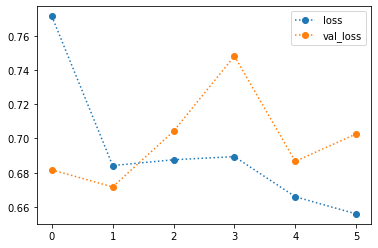

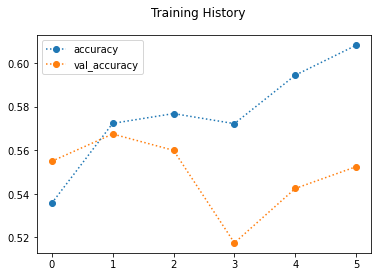

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         cat       0.56      0.76      0.65       800
         dog       0.63      0.41      0.50       800

    accuracy                           0.59      1600
   macro avg       0.60      0.59      0.57      1600
weighted avg       0.60      0.59      0.57      1600



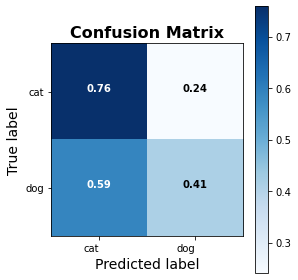


[i] Total Training Time: 0:00:06.904441
------------------------------------------------------------


In [44]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

fit_kws=dict(epochs=20,validation_data=(X_val_unrow,y_val))


sk_model = KerasClassifier(make_model_to_tune)

params = {'n_hidden_units':[(64,32),(128,32)],
         'act_func1':['relu',tf.keras.layers.LeakyReLU(),'tanh'],
          'act_func2':['relu',tf.keras.layers.LeakyReLU(),'tanh']}

gridsearch = GridSearchCV(sk_model,params,cv=3)
gridsearch.fit(X_train_unrow, y_train,**fit_kws,callbacks=make_callbacks())
make_fit_evaluate_model(gridsearch.best_estimator_)

In [45]:
gridsearch.best_params_

{'act_func1': 'relu', 'act_func2': 'relu', 'n_hidden_units': (64, 32)}

## APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```

# APPENDIX

## Older Functions

In [ ]:
stop

In [ ]:
def create_checkpoint(monitor,model_subfolder=""):#='Datasets/Models/cat_vs_dog/'):
    
    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
    return checkpoint

def create_early_stopping(monitor = 'val_accuracy',min_delta = 0.05, patience = 3,
                          verbose = 1, restore_best_weights = True):

    args = locals()
    earlystop = EarlyStopping(**args)
    return earlystop


def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
    model_subfolder=base_folder+'Models/'
    os.makedirs(model_subfolder,exist_ok=True)

    callbacks_list = [create_checkpoint('val_accuracy',
                                        model_subfolder=model_subfolder,**checkpoint_kws),
                      create_early_stopping(**early_stop_kws)]
    return callbacks_list

In [46]:
def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    ## Make a df from history
    plot_df = pd.DataFrame(history.history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig